In [302]:
import numpy as np 
import pandas as pd 
import scipy.stats as st 
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [303]:
data = pd.read_csv('GroupedOpData.csv')
data.Date = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.EXPIR_DATE = pd.to_datetime(data.EXPIR_DATE, format='%Y-%m-%d')
data['DTM'] = (data.EXPIR_DATE - data.Date).dt.days
data['CALL'] = pd.get_dummies(data.PUTCALLIND).CALL
data = data.drop(['Ticker', 'EXPIR_DATE', 'Date', 'PUTCALLIND'], axis=1)
data.columns

Index(['meanPDF', 'lagMean', 'varPDF', 'lagVar', 'skewPDF', 'lagSkew',
       'kurtPDF', 'lagKurt', 'leadMean', 'leadVar', 'leadSkew', 'leadKurt',
       'zScore', 'l2Mean', 'l2Var', 'l2Skew', 'l2Kurt', 'l3Mean', 'l3Var',
       'l3Skew', 'l3Kurt', 'l10Mean', 'l10Var', 'l10Skew', 'l10Kurt', 'DTM',
       'CALL'],
      dtype='object')

In [304]:
X = data.drop(['leadMean', 'leadVar', 'leadSkew', 'leadKurt', 
               'l10Mean', 'l10Var', 'l10Skew', 'l10Kurt'], axis=1).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[['leadMean', 'leadVar', 'leadSkew', 'leadKurt']].values
X.shape[2]
X.shape

(23133, 1, 19)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [279]:
# First LSTM attempt 
model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(1, 19)))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [280]:
model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
         )

Epoch 1/150
73/73 [==============================] - 0s 4ms/step - loss: 1690.3051 - val_loss: 73.9834
Epoch 2/150
73/73 [==============================] - 0s 2ms/step - loss: 900.7892 - val_loss: 62.4187
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 305.7103 - val_loss: 58.9089
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 113.8091 - val_loss: 56.7648
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 36.5378 - val_loss: 55.4615
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 10.2290 - val_loss: 55.3330
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 3.9035 - val_loss: 54.5561
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 3.1000 - val_loss: 54.3851
Epoch 9/150
73/73 [==============================] - 0s 2ms/step - loss: 2.9185 - val_loss: 54.3880
Epoch 10/150
73/73 [==============================] - 0s 2ms/step - loss: 2.9156 - val_lo

Epoch 1/150
73/73 [==============================] - 0s 5ms/step - loss: 13.2532 - val_loss: 0.6717
Epoch 2/150
73/73 [==============================] - 0s 2ms/step - loss: 0.2607 - val_loss: 0.2126
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1353
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 0.0975 - val_loss: 0.1147
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 0.0844 - val_loss: 0.1126
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 0.0814 - val_loss: 0.1093
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 0.0788 - val_loss: 0.1215
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 0.0753 - val_loss: 0.1073
Epoch 9/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0724 - val_loss: 0.1214
Epoch 10/150
73/73 [==============================] - 0s 2ms/step - loss: 0.0709 - val_loss: 0.1027
Epoch 11

Epoch 83/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0884
Epoch 84/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0557 - val_loss: 0.0894
Epoch 85/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0543 - val_loss: 0.0860
Epoch 86/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.0885
Epoch 87/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.0901
Epoch 88/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0867
Epoch 89/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0857
Epoch 90/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0884
Epoch 91/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0562 - val_loss: 0.0858
Epoch 92/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0535 - val_loss: 0.0840


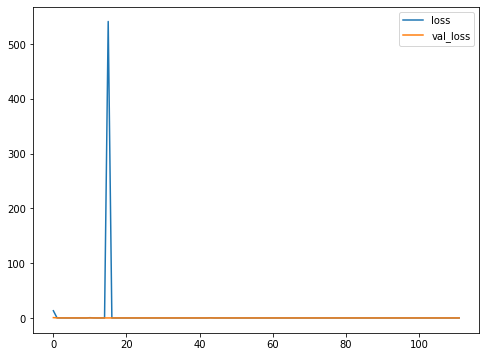

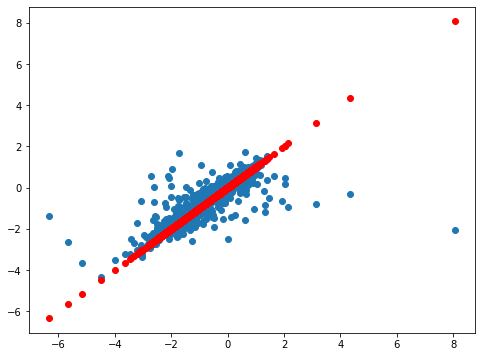

In [281]:
i = 2
X = data.drop(['leadMean', 'leadVar', 'leadSkew', 'leadKurt', 
               'l10Mean', 'l10Var', 'l10Skew', 'l10Kurt'], axis=1).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[['leadMean', 'leadVar', 'leadSkew', 'leadKurt']].values
X_train, X_test, y_train, y_test = train_test_split(X, y[:,i], test_size=0.2)
X_train.shape , y_test.shape

model = Sequential()
model.add(LSTM(19, activation='relu', return_sequences=True, input_shape=(1, 19)))
model.add(LSTM(19, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, 
        y=y_train, 
        epochs=150, 
        batch_size=256, 
        validation_data=(X_test, y_test), 
        callbacks=[early_stop]
        )

losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(8,6))

pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.scatter(y_test, y_test, color='r')

In [282]:
sklearn.metrics.r2_score(y_test, pred)

0.894773035373139

In [284]:
data = pd.read_csv('dData.csv')
data.columns

Index(['dMean', 'dVar', 'dSkew', 'dKurt', 'lMean', 'lVar', 'lSkew', 'lKurt',
       'l2Mean', 'l2Var', 'l2Skew', 'l2Kurt', 'l3Mean', 'l3Var', 'l3Skew',
       'l3Kurt'],
      dtype='object')

In [285]:
X = data.drop(['dMean', 'dVar', 'dSkew', 'dKurt'], axis=1).values
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[['dMean', 'dVar', 'dSkew', 'dKurt']].values

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [287]:
# First LSTM attempt 
model = Sequential()
model.add(LSTM(12, activation='relu', return_sequences=True, input_shape=(1, 12)))
#model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

Epoch 1/150
73/73 [==============================] - 0s 4ms/step - loss: 9002049.0000 - val_loss: 231757.7344
Epoch 2/150
73/73 [==============================] - 0s 2ms/step - loss: 8952472.0000 - val_loss: 191234.6094
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 8669995.0000 - val_loss: 167287.2969
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 8449040.0000 - val_loss: 146222.6094
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 8363764.5000 - val_loss: 128245.0781
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 8199935.0000 - val_loss: 113092.4844
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 8140930.5000 - val_loss: 98669.7734
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 8092212.5000 - val_loss: 11.8701
Epoch 9/150
73/73 [==============================] - 0s 2ms/step - loss: 8067320.0000 - val_loss: 11.5750
Epoch 10/150
73/73 

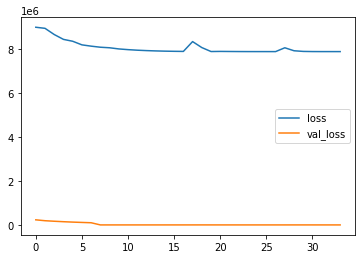

In [288]:
model.fit(x=X_train, 
         y=y_train, 
         epochs=150, 
          batch_size=256, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
         )

losses = pd.DataFrame(model.history.history)
losses.plot()

Epoch 1/150
73/73 [==============================] - 0s 5ms/step - loss: 12781.7109 - val_loss: 0.0274
Epoch 2/150
73/73 [==============================] - 0s 2ms/step - loss: 596.2126 - val_loss: 0.0198
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 482.2345 - val_loss: 0.0198
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 156.7866 - val_loss: 0.0197
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 56.1783 - val_loss: 0.0196
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 39.8905 - val_loss: 0.0196
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 31.7884 - val_loss: 0.0195
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 0.8836 - val_loss: 0.0195
Epoch 9/150
73/73 [==============================] - 0s 2ms/step - loss: 0.7540 - val_loss: 0.0195
Epoch 10/150
73/73 [==============================] - 0s 2ms/step - loss: 0.6465 - val_loss: 0.0

-0.0028883419035570235

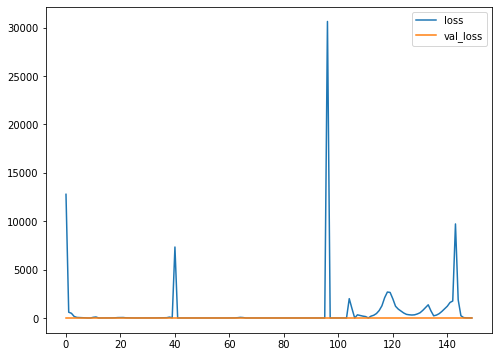

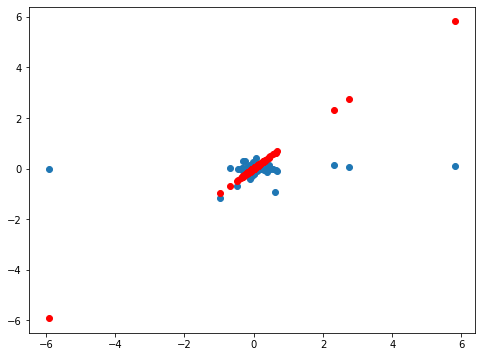

In [289]:
i = 0
X = data.drop(['dMean', 'dVar', 'dSkew', 'dKurt'], axis=1).values
# [samples, timesteps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[['dMean', 'dVar', 'dSkew', 'dKurt']].values
X_train, X_test, y_train, y_test = train_test_split(X, y[:,i], test_size=0.2)
X_train.shape , y_test.shape

model = Sequential()
model.add(LSTM(12, activation='relu', return_sequences=True, input_shape=(1, 12)))
model.add(LSTM(24, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, 
        y=y_train, 
        epochs=150, 
        batch_size=256, 
        validation_data=(X_test, y_test), 
        #callbacks=[early_stop]
        )

losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(8,6))

pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.scatter(y_test, y_test, color='r')
sklearn.metrics.r2_score(y_test, pred)

Epoch 1/150
73/73 [==============================] - 0s 6ms/step - loss: 2709.8572 - val_loss: 0.0465
Epoch 2/150
73/73 [==============================] - 0s 3ms/step - loss: 31.5077 - val_loss: 0.0448
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 298.0374 - val_loss: 0.0451
Epoch 4/150
73/73 [==============================] - 0s 3ms/step - loss: 234.7966 - val_loss: 0.0549
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 191.4623 - val_loss: 0.0447
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 97.9644 - val_loss: 0.0446
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 71.6263 - val_loss: 0.0443
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 95.4923 - val_loss: 0.0441
Epoch 9/150
73/73 [==============================] - 0s 2ms/step - loss: 138.6511 - val_loss: 0.0434
Epoch 10/150
73/73 [==============================] - 0s 2ms/step - loss: 559.1110 - val_loss:

-0.32054587695685766

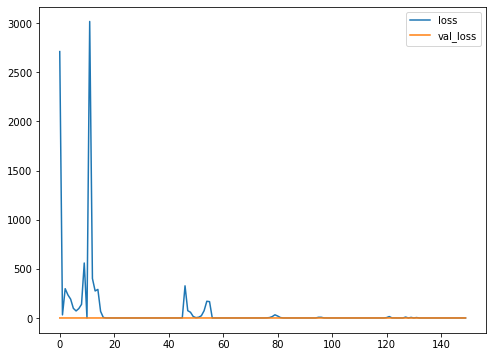

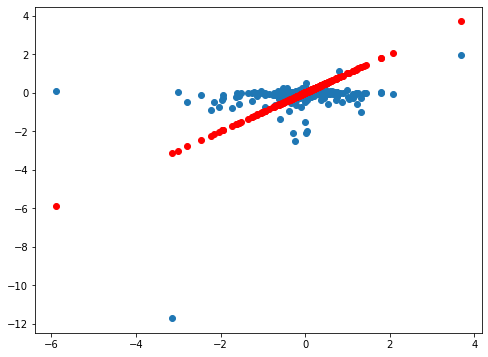

In [290]:
i = 1
X = data.drop(['dMean', 'dVar', 'dSkew', 'dKurt'], axis=1).values
# [samples, timesteps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[['dMean', 'dVar', 'dSkew', 'dKurt']].values
X_train, X_test, y_train, y_test = train_test_split(X, y[:,i], test_size=0.2)
X_train.shape , y_test.shape

model = Sequential()
model.add(LSTM(12, activation='relu', return_sequences=True, input_shape=(1, 12)))
model.add(LSTM(24, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, 
        y=y_train, 
        epochs=150, 
        batch_size=256, 
        validation_data=(X_test, y_test), 
        #callbacks=[early_stop]
        )

losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(8,6))

pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.scatter(y_test, y_test, color='r')
sklearn.metrics.r2_score(y_test, pred)

Epoch 1/150
73/73 [==============================] - 0s 5ms/step - loss: 1588.8621 - val_loss: 10976.1006
Epoch 2/150
73/73 [==============================] - 0s 2ms/step - loss: 1580.8396 - val_loss: 9397.4258
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 1577.3677 - val_loss: 6764.1411
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 1575.5194 - val_loss: 5540.5288
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 1574.2810 - val_loss: 3663.8123
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 1573.2578 - val_loss: 2936.0100
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 1571.8074 - val_loss: 2476.6260
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 1571.2667 - val_loss: 11861.5791
Epoch 9/150
73/73 [==============================] - 0s 2ms/step - loss: 1569.7806 - val_loss: 5660.5034
Epoch 10/150
73/73 [==============================] -

-19.82687538313464

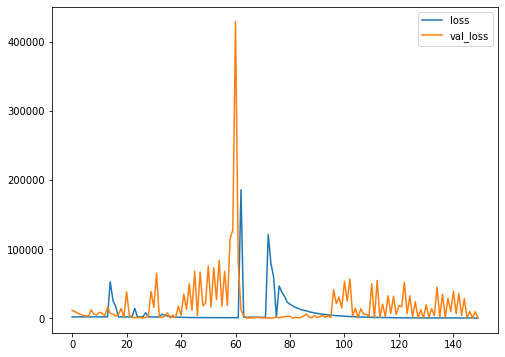

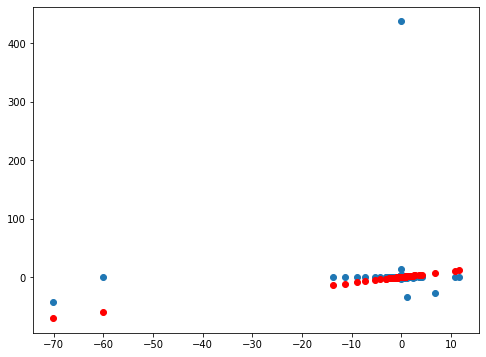

In [291]:
i = 2
X = data.drop(['dMean', 'dVar', 'dSkew', 'dKurt'], axis=1).values
# [samples, timesteps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[['dMean', 'dVar', 'dSkew', 'dKurt']].values
X_train, X_test, y_train, y_test = train_test_split(X, y[:,i], test_size=0.2)
X_train.shape , y_test.shape

model = Sequential()
model.add(LSTM(12, activation='relu', return_sequences=True, input_shape=(1, 12)))
model.add(LSTM(24, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, 
        y=y_train, 
        epochs=150, 
        batch_size=256, 
        validation_data=(X_test, y_test), 
        #callbacks=[early_stop]
        )

losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(8,6))

pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.scatter(y_test, y_test, color='r')
sklearn.metrics.r2_score(y_test, pred)

Epoch 1/150
73/73 [==============================] - 0s 6ms/step - loss: 54.5206 - val_loss: 21.2754
Epoch 2/150
73/73 [==============================] - 0s 3ms/step - loss: 7.3408 - val_loss: 107.1905
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3710 - val_loss: 1.5754
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3553 - val_loss: 25.0827
Epoch 5/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3457 - val_loss: 54.7723
Epoch 6/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3388 - val_loss: 65.8525
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3747 - val_loss: 348.1894
Epoch 8/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3273 - val_loss: 0.5185
Epoch 9/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3275 - val_loss: 205.7167
Epoch 10/150
73/73 [==============================] - 0s 2ms/step - loss: 0.3210 - val_loss: 72.38

-588.2565582255845

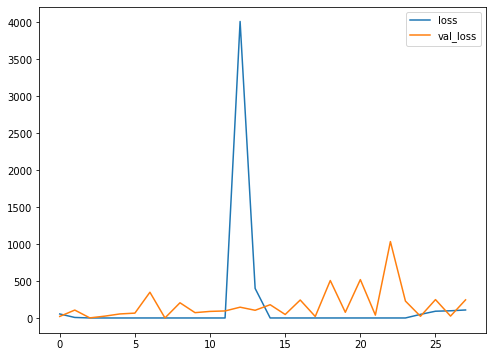

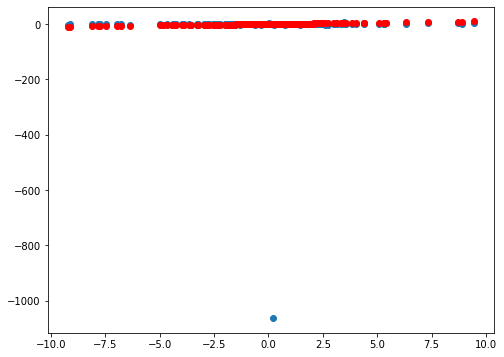

In [292]:
i = 3
X = data[abs(data.dKurt) < 10].drop(['dMean', 'dVar', 'dSkew', 'dKurt'], axis=1).values
# [samples, timesteps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])
y = data[abs(data.dKurt) < 10][['dMean', 'dVar', 'dSkew', 'dKurt']].values
X_train, X_test, y_train, y_test = train_test_split(X, y[:,i], test_size=0.2)
X_train.shape , y_test.shape

model = Sequential()
model.add(LSTM(12, activation='relu', return_sequences=True, input_shape=(1, 12)))
model.add(LSTM(24, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, 
        y=y_train, 
        epochs=150, 
        batch_size=256, 
        validation_data=(X_test, y_test), 
        callbacks=[early_stop]
        )

losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(8,6))

pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred)
plt.scatter(y_test, y_test, color='r')
sklearn.metrics.r2_score(y_test, pred)

(131,
 count     23210.000000
 mean          0.001794
 std        5366.571144
 min     -578928.655157
 25%          -0.025136
 50%          -0.000165
 75%           0.025284
 max      577176.158945
 Name: dKurt, dtype: float64)

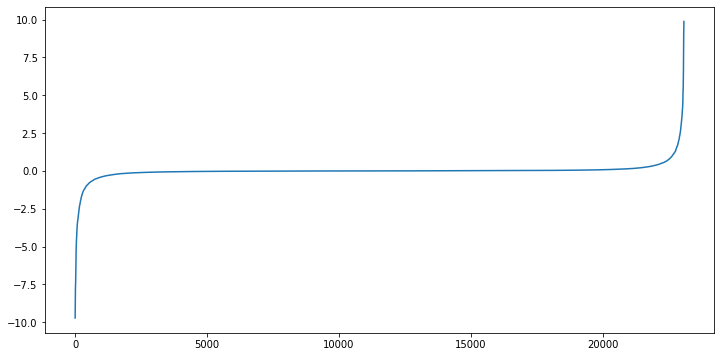

In [293]:
data.dKurt[abs(data.dKurt) < 10].sort_values().reset_index(drop=True).plot(figsize=(12,6))
(abs(data.dKurt) > 10).sum(), data.dKurt.describe()

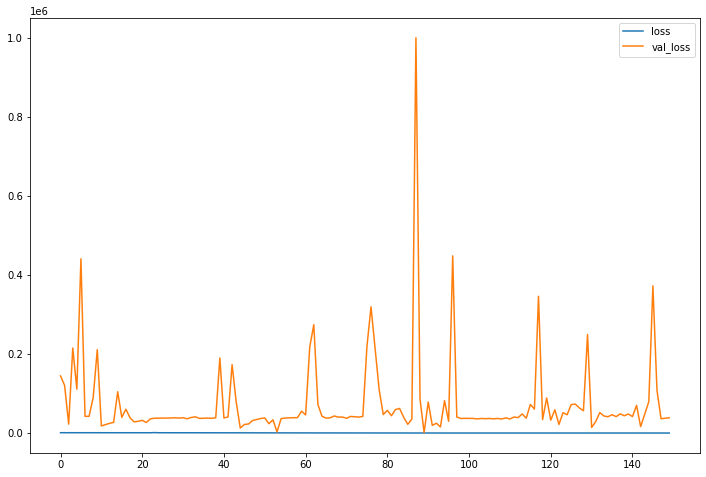

In [164]:
losses.plot(figsize=(12,8))
#plt.savefig('lstmSkewLoss.png')

In [299]:
data.shape[0] / 252

92.10317460317461

In [300]:
data

,dMean,dVar,dSkew,dKurt,lMean,lVar,lSkew,lKurt,l2Mean,l2Var,l2Skew,l2Kurt,l3Mean,l3Var,l3Skew,l3Kurt
0,0.011228,-0.000474,-0.074472,0.008186,0.009983,-0.000174,-0.005808,0.034200,0.175575,-0.017642,-0.091059,0.000500,-0.004626,-0.001405,-0.014665,0.038154
1,0.010540,-0.000060,-0.047132,-0.021440,0.009396,-0.000016,0.006000,0.047465,0.190366,-0.022028,-0.008569,0.070155,-0.010374,0.001564,-0.013978,-0.001050
2,-0.020388,0.000931,0.046028,-0.049501,0.011228,-0.000474,-0.074472,0.008186,0.009983,-0.000174,-0.005808,0.034200,0.175575,-0.017642,-0.091059,0.000500
3,-0.018804,0.000306,0.008600,-0.017894,0.010540,-0.000060,-0.047132,-0.021440,0.009396,-0.000016,0.006000,0.047465,0.190366,-0.022028,-0.008569,0.070155
4,-0.085356,0.017739,0.430982,-0.234977,-0.020388,0.000931,0.046028,-0.049501,0.011228,-0.000474,-0.074472,0.008186,0.009983,-0.000174,-0.005808,0.034200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23205,0.046100,-0.020172,-1.780350,2.644902,0.007588,0.000965,-0.131626,-0.043626,0.026318,-0.007867,0.040112,0.137407,-0.024350,0.009291,0.040624,-0.198168
23206,0.103541,-0.009025,-0.175524,0.716254,0.005736,-0.010802,0.487234,-0.935550,0.002163,-0.003713,0.205442,-0.441295,-0.003339,0.004179,-0.264646,0.495872
23207,0.204097,-0.046138,-0.047910,0.166170,-0.070756,0.028098,-0.313939,0.585884,0.042310,-0.021352,0.388111,-0.620813,-0.036609,0.024804,-0.369002,0.685972
23208,0.020772,-0.016013,0.101704,0.024535,0.001438,-0.000969,0.054133,-0.022097,0.002445,-0.001011,0.075118,-0.077453,-0.025847,0.009717,-0.215730,0.409092
